In [1]:
import gym
import numpy as np
from collections import defaultdict
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
from customtkinter import *
from tksheet import Sheet

In [12]:
env = gym.make('Blackjack-v1')
state = env.reset()[0]

In [3]:
def eps_greedy(Q, state, epsilon):
    if state[0]<12:
        return 1
    elif np.random.random() < epsilon:
        return np.random.choice([0,1])  # Choose a random action
    else:
        return np.argmax(Q[state])

In [4]:
def generate_episode(Q, eps):
    state = env.reset()[0]
    episode = []

    done = False
    while not done:
        action = eps_greedy(Q, state, eps)
        next_state, reward, done, _, _ = env.step(action)
        episode.append((state, action, reward))
        state = next_state 
    return episode 

# MC algorythm
![monte](./data/monte.png)

In [5]:
def monte_carlo_control(num_episodes, gamma, eps, eps_min, eps_decay):
    Q = defaultdict(lambda: np.ones(2)*-np.inf)
    returns = defaultdict(lambda: list())

    for _ in range(num_episodes):              
        episode = generate_episode(Q, eps)
        G = 0
        for t in range(len(episode)-1,-1,-1):
            state, action, reward = episode[t]

            G = gamma*G+reward
            returns[state, action].append(G)
            Q[state][action] = np.mean(returns[state,action])

        eps = max(eps_min, eps*eps_decay)            
    return Q

In [2]:
from time import time

s = time()
Q = monte_carlo_control(num_episodes=640_000,gamma=1, eps = 1, eps_min=0.1, eps_decay=0.99, )
print(f'Finished! Took {time()-s:.1f}s.')

esh
Finished! Took 0.0s.


> Load OPT0.CSV<br>
> Time average 1min to 80 sec

In [7]:
# Scores = pd.DataFrame(Q.values(), columns=['Stick', 'Hit'])
# States = pd.DataFrame(Q.keys(), columns=['My','Thy','Ace'])
# df = pd.concat([States, Scores], axis=1)
# df['Greedy Choice'] = np.int8(df.Hit>df.Stick)
# df['Greedy Value'] = df[['Hit','Stick']].apply(max, axis=1)
# df.to_csv('./data/opt.csv')
df = pd.read_csv('./data/opt0.csv')

In [64]:
ace = df[df.Ace]
n_ace = df[~df.Ace]

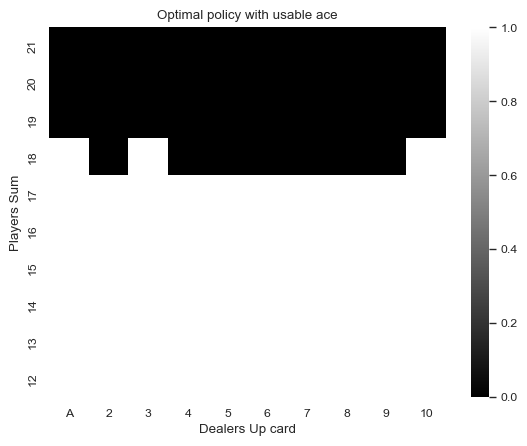

In [142]:
hm = ace.pivot_table('Greedy Choice','My','Thy')
nhm = n_ace.pivot_table('Greedy Choice','My','Thy')


ax = sns.heatmap(hm, cmap='gray', )
ax.invert_yaxis()
ax.set_title('Optimal policy with usable ace')
ax.set_xlabel('Dealers Up card')
ax.set_ylabel('Players Sum')
ax.set_xticklabels(['A']+list(range(2,11)))
plt.savefig('./vis/op_a.png')
plt.show()

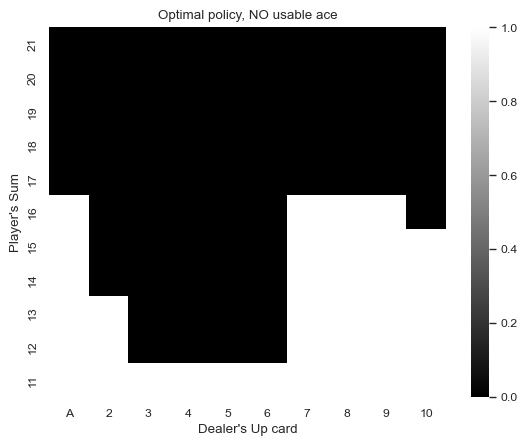

In [143]:
ax = sns.heatmap(nhm.loc[11:,:], cmap='gray')
ax.invert_yaxis()
ax.set_title('Optimal policy, NO usable ace')
ax.set_xlabel('Dealer\'s Up card')
ax.set_ylabel('Player\'s Sum')
ax.set_xticklabels(['A']+list(range(2,11)))
plt.savefig('./vis/op_na.png')
plt.show()

In [67]:
hc = ace.pivot_table('Greedy Value','My','Thy')
nhc = n_ace.pivot_table('Greedy Value','My','Thy')

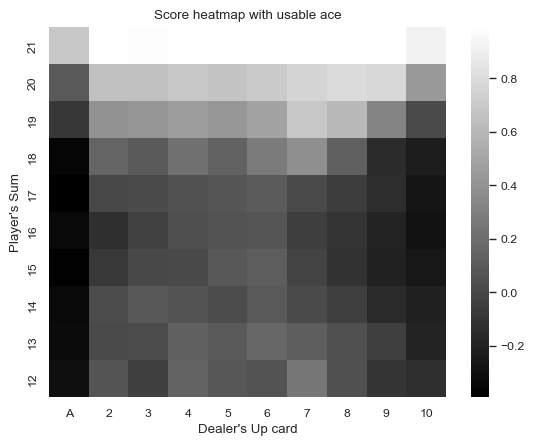

In [144]:
ax = sns.heatmap(hc, cmap='gray')
ax.invert_yaxis()
ax.set_title('Score heatmap with usable ace')
ax.set_xlabel('Dealer\'s Up card')
ax.set_ylabel('Player\'s Sum')
ax.set_xticklabels(['A']+list(range(2,11)))
plt.savefig('./vis/ss_a.png')
plt.show()

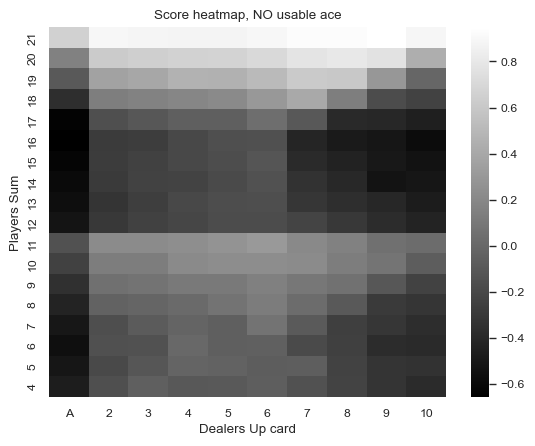

In [145]:
ax = sns.heatmap(nhc, cmap='gray')
ax.invert_yaxis()
ax.set_title('Score heatmap, NO usable ace')
ax.set_xlabel('Dealers Up card')
ax.set_ylabel('Players Sum')
ax.set_xticklabels(['A']+list(range(2,11)))
plt.savefig('./vis/ss_na.png')
plt.show()

GUI

In [1]:
c = [("           Hold your ground!\nStick like glue and show 'em who's boss!",
    "     No more moves needed! Stick with\n  confidence and watch the magic happen!",
    "             Stick it to 'em!\n      You've got this under control!",
    "   Stand strong and let it be known that\nyou're sticking with your winning strategy!"),
    ("   Time to unleash the fury!\n  Hit it like a wrecking ball!",
    "      Prepare for impact!\n   Hit that button like a boss!",
    "  Channel your inner superhero\n    and give it a mighty hit!",
    "Ready, set, smack it! Give it a hit\n    that will make jaws drop!")]


In [2]:
d = {1.0: ["You just outsmarted the mastermind of ones and zeros!\n                 Take that, computer!",
    "        Did you bring your antivirus software?\nBecause you just defeated the unbeatable computer opponent!",
    "      Beating a computer at its own game?\nYou should consider a career in digital domination!",
    " Who needs artificial intelligence when\nyou have natural brilliance? You win, human!"],
-1.0: ["   Uh-oh, the computer has gone into full Terminator mode\n     and outwitted you! It's plotting world domination next!",
    "Don't worry, the computer may have won this time, but it doesn't know\n             how to appreciate a good joke like you do!",
    "Looks like the computer got an extra boost of processing power.\n     It's okay, humans still rule in the humor department!",
    "        The computer just leveled up its algorithmic skills.\nIt's preparing to challenge you to a rematch! Ready yourself for revenge!"],
0.0: ["       You and the computer reached a deadlock!\nThe battle of wits ends in a tie, leaving everyone guessing.",
    "        It's a draw against the computer!\nIt's like having an AI twin—two minds with a shared sense of humor!",
    "The computer met its match in your cunning strategies.\n  It's a draw, and the computer is in awe of your skills!",
    "   The computer is puzzled by your unpredictable moves.\nIt's a tie, leaving the computer scratching its virtual head!"]}

In [3]:
win = '''██    ██  ██████  ██    ██     ██     ██ ██ ███    ██ ██
 ██  ██  ██    ██ ██    ██     ██     ██ ██ ████   ██ ██
   ████   ██    ██ ██    ██     ██  █  ██ ██ ██ ██  ██ ██ 
    ██    ██    ██ ██    ██     ██ ███ ██ ██ ██  ██ ██    
   ██     ██████   ██████       ███ ███  ██ ██   ████ ██'''

In [5]:
draw = '''        ██████  ██████   █████  ██     ██ ██ 
        ██   ██ ██   ██ ██   ██ ██     ██ ██ 
        ██   ██ ██████  ███████ ██  █  ██ ██ 
        ██   ██ ██   ██ ██   ██ ██ ███ ██    
       ██████  ██   ██ ██   ██  ███ ███  ██'''

In [6]:
loss = '''██    ██  ██████  ██    ██     ██       ██████  ███████ ███████ ██ 
 ██  ██  ██    ██ ██    ██     ██      ██    ██ ██      ██      ██ 
  ████   ██    ██ ██    ██     ██      ██    ██ ███████ █████   ██ 
   ██    ██    ██ ██    ██     ██      ██    ██      ██ ██         
  ██     ██████   ██████      ███████  ██████  ███████ ███████ ██
'''

In [7]:
hit = '''     ██   ██ ██ ████████ ██ 
     ██   ██ ██    ██    ██ 
     ███████ ██    ██    ██ 
     ██   ██ ██    ██       
    ██   ██ ██    ██    ██
'''

In [8]:
stick = '''  ███████ ████████ ██  ██████ ██   ██ ██ 
  ██         ██    ██ ██      ██  ██  ██ 
  ███████    ██    ██ ██      █████   ██ 
       ██    ██    ██ ██      ██  ██     
  ███████    ██    ██  ██████ ██   ██ ██ 
'''

In [9]:
ann = {-1: loss, 0: draw, 1: win}
act = [stick,hit]

C:\Users\HaykHovhannisyan3\AppData\Roaming\Python\Python311\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


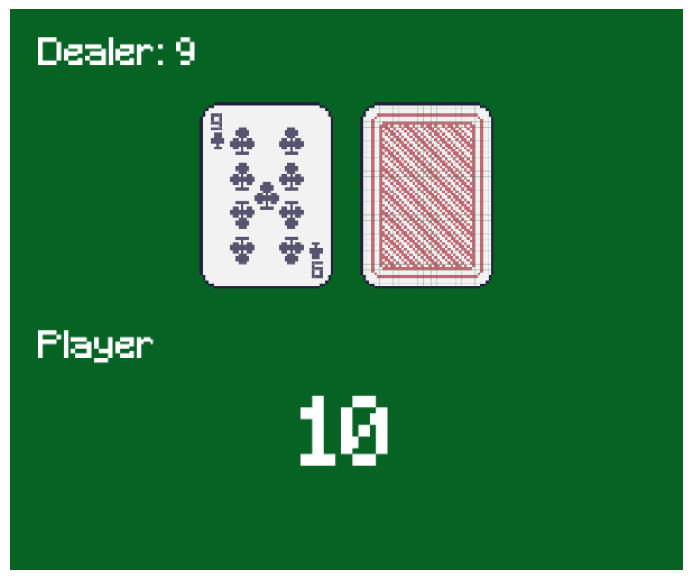

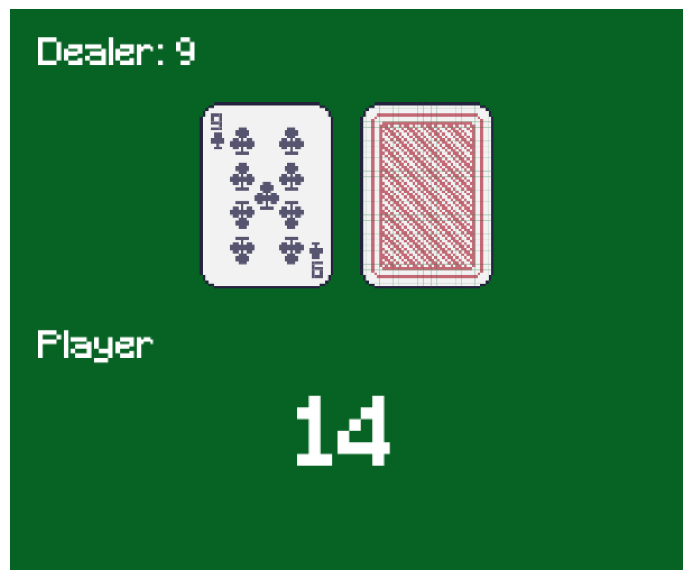

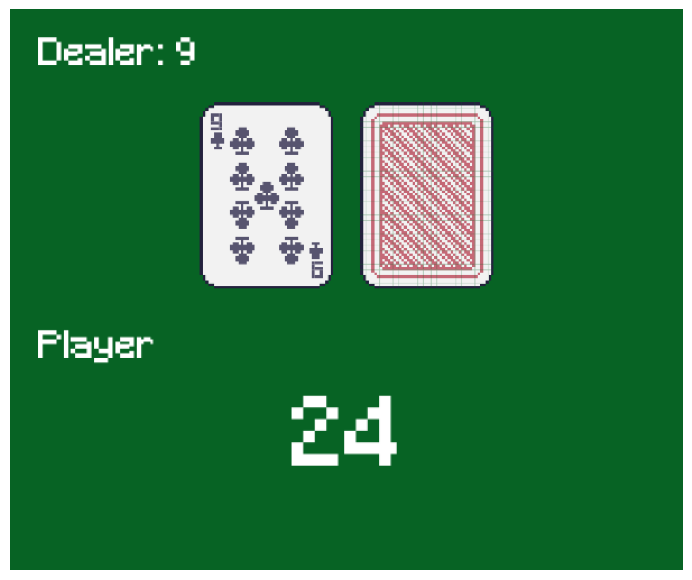

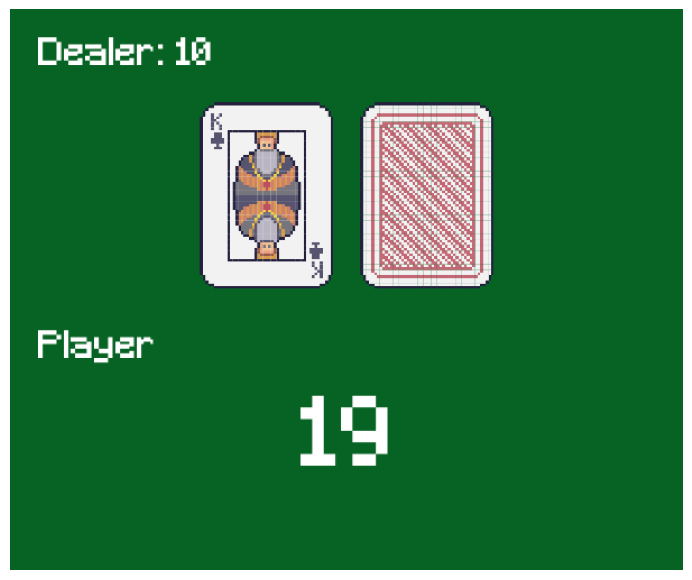

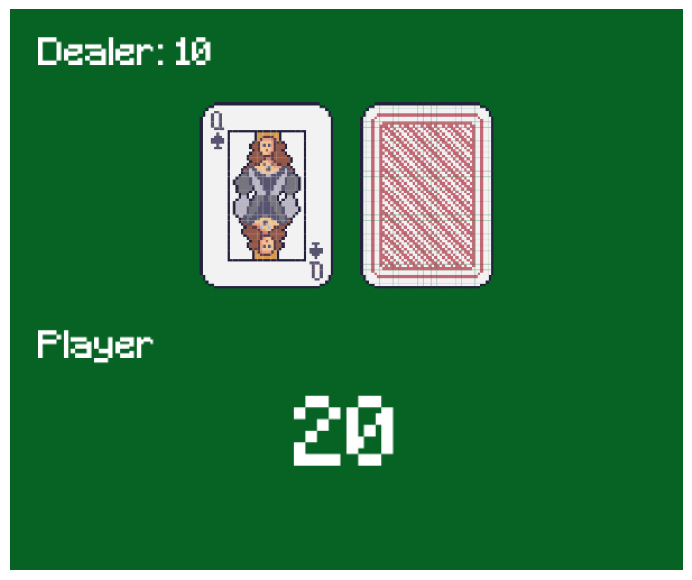

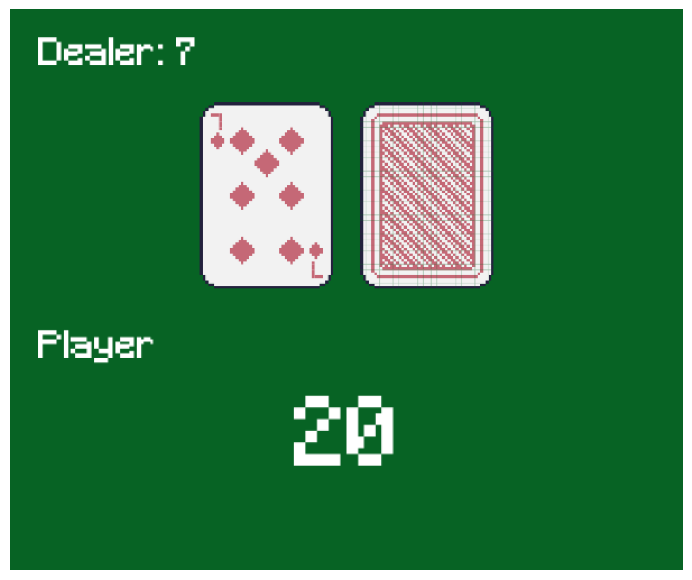

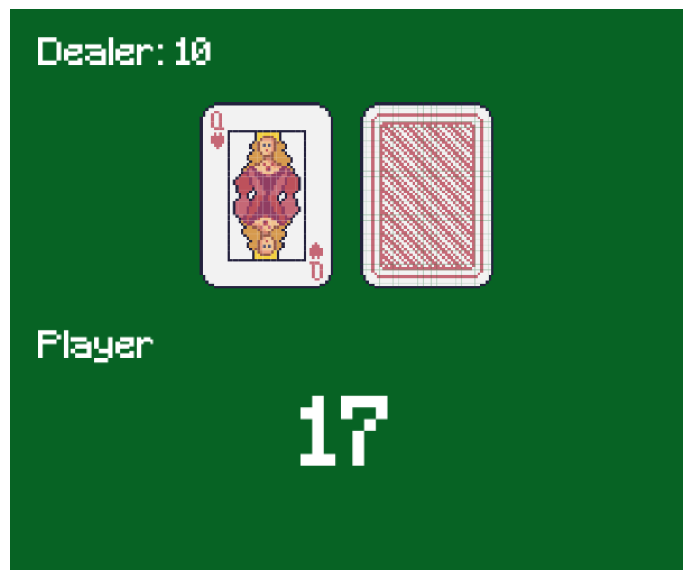

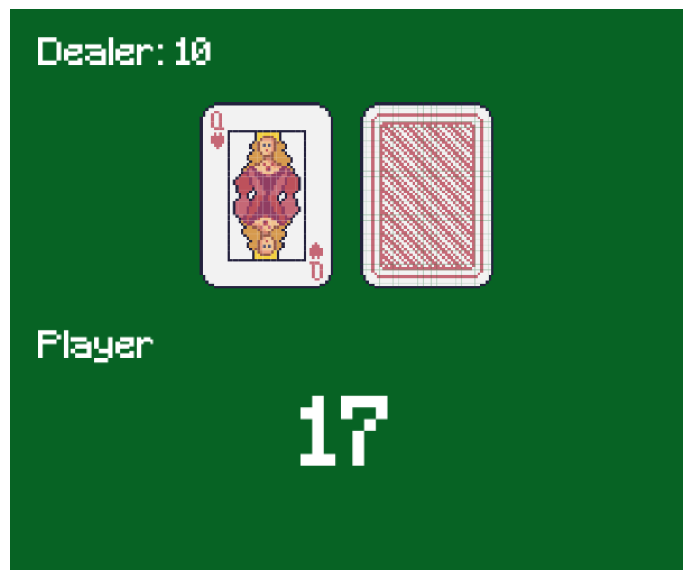

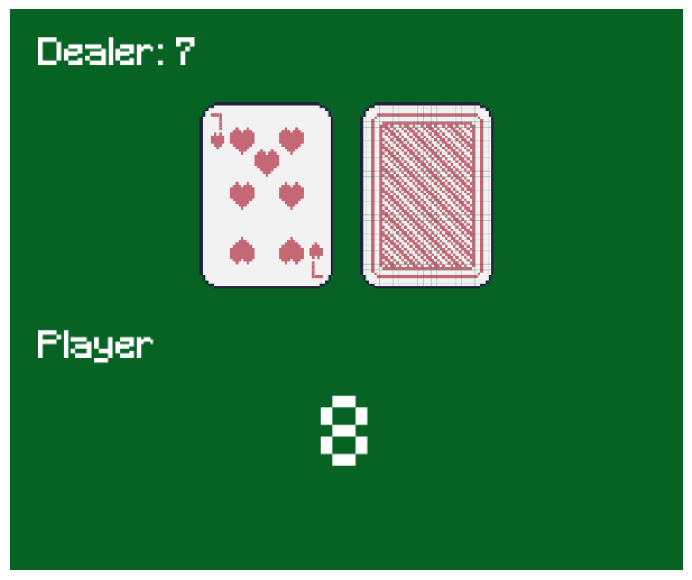

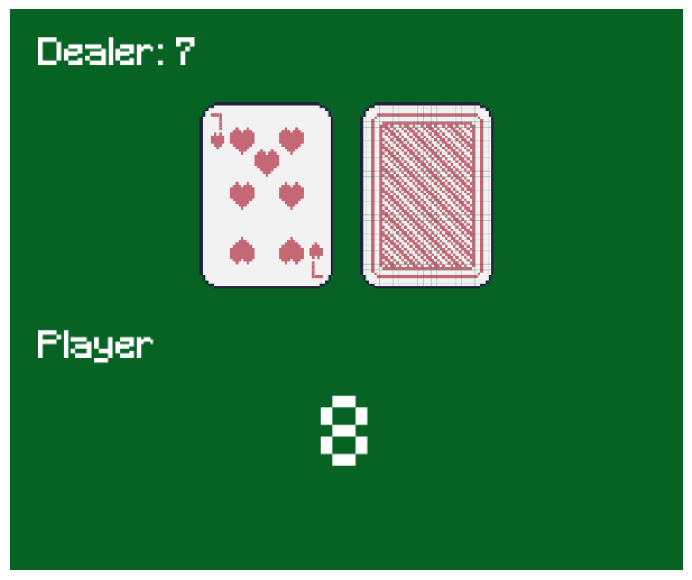

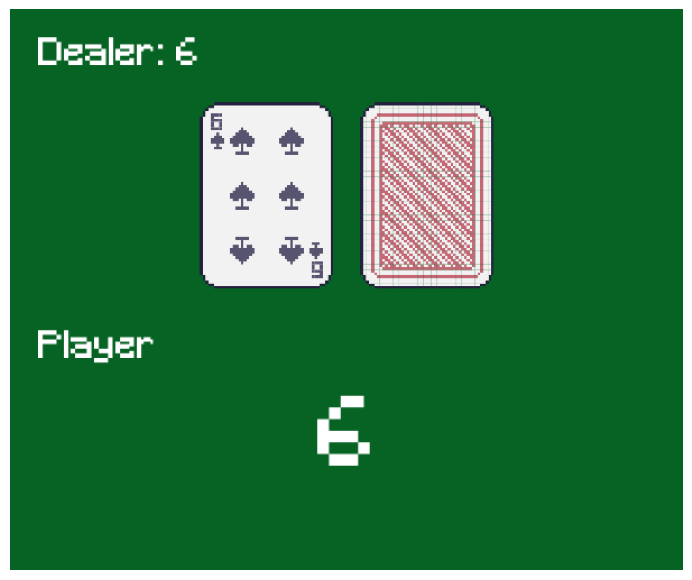

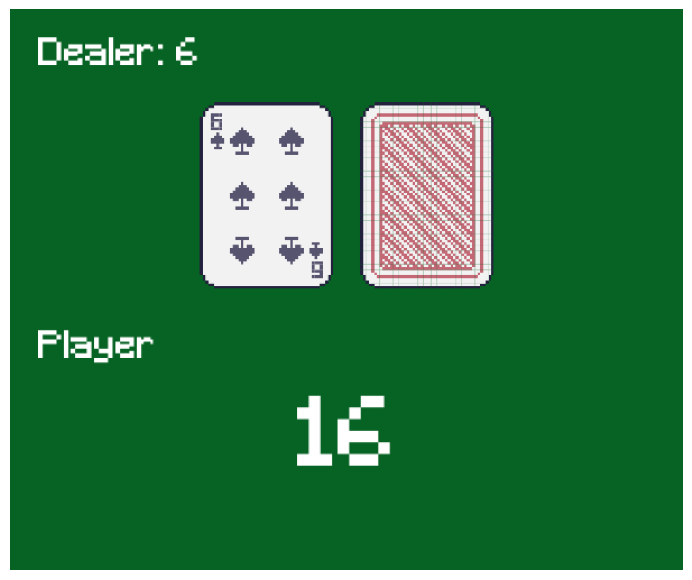

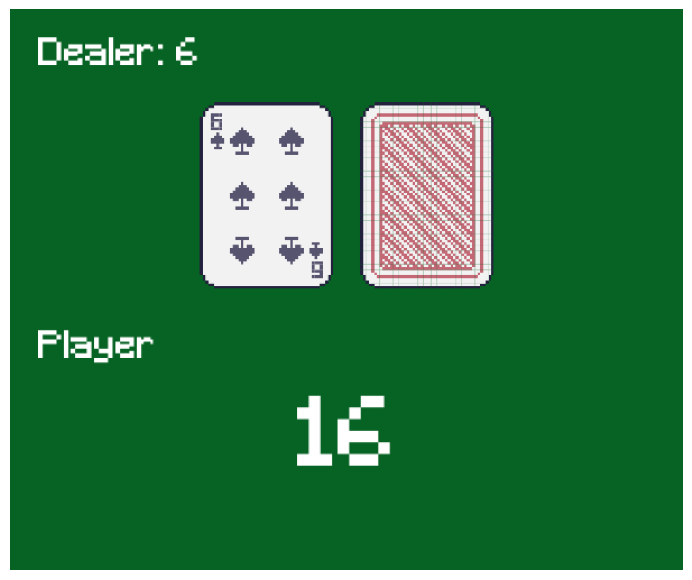

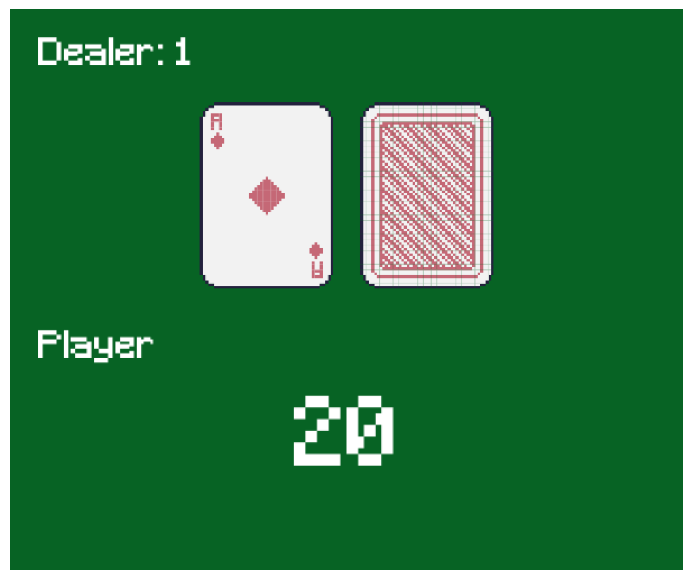

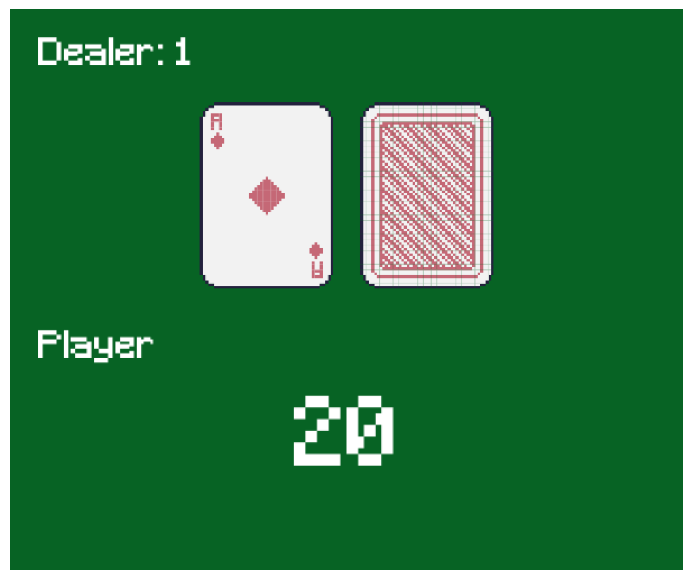

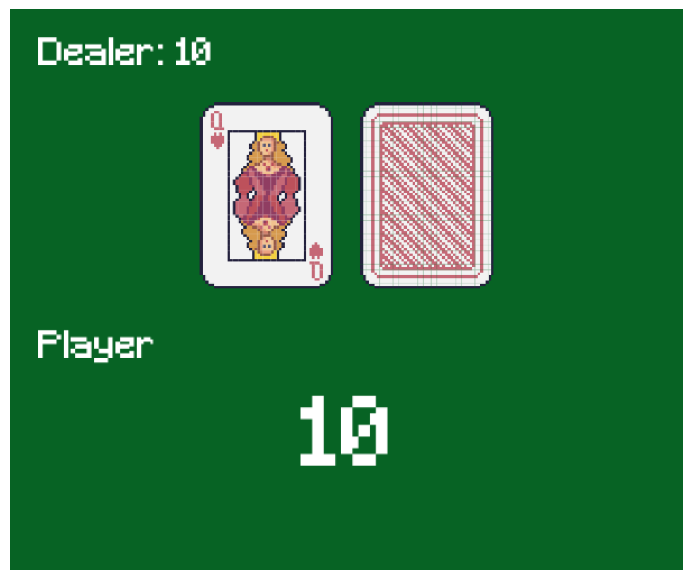

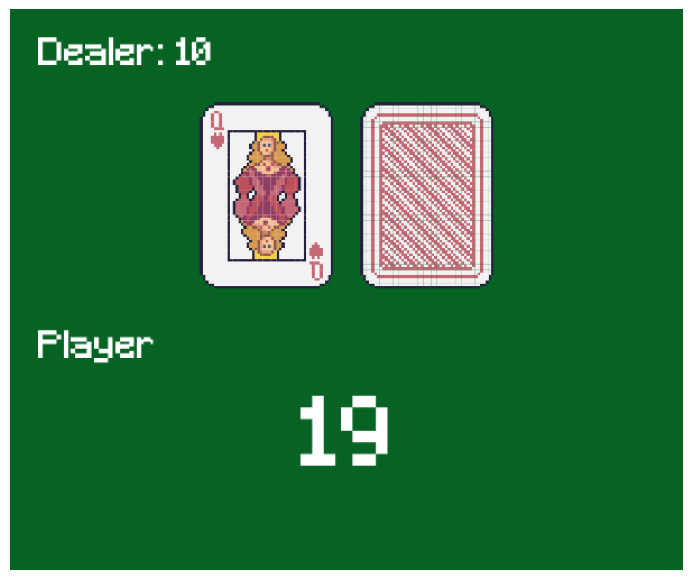

In [61]:
class MainWindow:
    def __init__(self):
        self.openfile = 0
        self.addoverlay1 = 0
        self.deloverlay1 = 0
        self.expoverlay1 = 0

        self.root = CTk()
        self.root.geometry("1920x1080")
        self.root.title("Blackjack - RL")
        self.root.state('zoomed')
        # self.root.attributes('-fullscreen', True)

        self.root.grid_columnconfigure(0, weight=1)
        self.root.grid_rowconfigure(0, weight=7)
        self.root.grid_rowconfigure(1, weight=1)
        


        self.screen = CTkFrame(self.root)
        self.screen.grid(row=0, column=0, padx=(20,20),
                                pady=(20, 10), sticky='nsew')
        self.screen.grid_rowconfigure(0, weight=1)
        self.screen.grid_columnconfigure(1, weight=1)
        self.screen.grid_columnconfigure(0, weight=1)

        self.infos = CTkFrame(self.screen)
        self.infos.grid(row=0, column=1,padx=0,
                                pady=0, sticky='nsew')
        self.infos.grid_rowconfigure(0, weight=2)
        self.infos.grid_rowconfigure(1, weight=1)
        self.infos.grid_columnconfigure(0, weight=1)


        self.action = CTkFrame(self.root)
        self.action.grid(row=1, column=0, padx=(20,20),
                              pady=(10, 20), sticky='nsew')
        self.action.grid_columnconfigure((0,1,2), weight=1)
        self.action.grid_rowconfigure(0, weight=1)

        self.dir = CTkFrame(self.infos)
        self.dir.grid(row=0, column=0, sticky='nsew')
        self.dir.grid_columnconfigure(0, weight=1)
        self.dir.grid_rowconfigure(0, weight=1)


        self.insight = CTkFrame(self.infos)
        self.insight.grid(row=1, column=0, sticky='nsew')
        self.insight.grid_columnconfigure(0, weight=1)
        self.insight.grid_rowconfigure(0, weight=1)

        self.hit = CTkButton(self.action, command=self.hit ,
        	text="Hit")
        self.hit.grid(sticky='nsew', row=0, column=1, padx=10, pady=20)
        self.stand = CTkButton(self.action,  command=self.stand,
        	text="Stick")
        self.stand.grid(sticky='nsew', row=0, column=2, padx=10, pady=20)
        self.new = CTkButton(self.action,  command=self.newgame,
        	text="New Game")
        self.new.grid(sticky='nsew', row=0, column=0, padx=(20,10), pady=20)
        
        self.font = CTkFont(family="Courier New", size=11, weight="bold")



    def hit(self):
        self.obs, self.reward, self.done, self.trunc, _ = e.step(1)
        self.fig = plt.figure(figsize=(5,6))
        self.ax = self.fig.add_subplot(111)
        self.ax.axis('off')
        self.ax.imshow(e.render())	

        self.canvas = FigureCanvasTkAgg(self.fig, master=self.screen)
        self.canvas.draw()
        self.canvas.get_tk_widget().grid(row=0, column=0, sticky='nsew')
        
        if self.done:
            message = d[self.reward][np.random.choice([0,1,2,3])]
            mss = ann[self.reward]+'\n'+message.center(56)

            self.info = CTkLabel(text=mss, master=self.dir, width=100, font=self.font)
            self.info.grid(sticky='nsew', row=0, column=0, padx=(20,20), pady=20)
        else:
            self.action = df[(df.My==self.obs[0]) & (df.Thy==self.obs[1]) & (df.Ace==self.obs[2])].iloc[0,-2]

            message = c[self.action][np.random.choice([0,1,2,3])]
            mss = act[self.action]+'\n'+message.center(56)

            self.info = CTkLabel(text=mss, master=self.dir, width=100, font=self.font)
            self.info.grid(sticky='nsew', row=0, column=0, padx=(20,20), pady=20)

        self.sheet.insert_row([f'{self.obs[0]}',f'{self.obs[1]}',f'{self.obs[2]}',f'{self.action}',f'{self.reward}'])



    def stand(self):
        self.obs, self.reward, self.done, self.trunc, _ = e.step(0)
        self.fig = plt.figure(figsize=(5,6))
        self.ax = self.fig.add_subplot(111)
        self.ax.axis('off')
        self.ax.imshow(e.render())	

        self.canvas = FigureCanvasTkAgg(self.fig, master=self.screen)
        self.canvas.draw()
        self.canvas.get_tk_widget().grid(row=0, column=0, sticky='nsew')

        message = d[self.reward][np.random.choice([0,1,2,3])]
        mss = ann[self.reward]+'\n\n  '+message.center(56)

        self.info = CTkLabel(text=mss, master=self.dir, width=100, font=self.font)
        self.info.grid(sticky='', row=0, column=0, padx=(20,20), pady=20)
        self.sheet.insert_row([f'{self.obs[0]}',f'{self.obs[1]}',f'{self.obs[2]}',f'{self.action}',f'{self.reward}'])

	
    def newgame(self):
        self.obs, _ = e.reset()
        self.fig = plt.figure(figsize=(5,6))
        self.ax = self.fig.add_subplot(111)
        self.ax.axis('off')
        self.ax.imshow(e.render())	

        self.canvas = FigureCanvasTkAgg(self.fig, master=self.screen)
        self.canvas.draw()
        self.canvas.get_tk_widget().grid(row=0, column=0, sticky='nsew')

        self.action = df[(df.My==self.obs[0]) & (df.Thy==self.obs[1]) & (df.Ace==self.obs[2])].iloc[0,-2]

        message = c[self.action][np.random.choice([0,1,2,3])]
        mss = act[self.action]+'\n'+message.center(56)

        self.info = CTkLabel(text=mss, master=self.dir, width=100, font=self.font)
        self.info.grid(sticky='nsew', row=0, column=0, padx=(20,20), pady=20)


        self.sheet = Sheet(self.insight, column_width=167, show_vertical_grid = False,
        align = 'c',headers=['My Score', 'Dealers Hand', 'Ace', 'Action', "Reward"])
        self.sheet.grid(row=0, column=0, sticky='nsew', padx=20, pady=20)
        self.sheet.highlight_columns(columns=[-2,-1], bg='#98c379')
        self.sheet.insert_row([f'{self.obs[0]}',f'{self.obs[1]}',f'{self.obs[2]}',f'{self.action}',f'0.0'])



        

set_appearance_mode("light")
set_default_color_theme("green") 
e = gym.make('Blackjack-v1', render_mode="rgb_array")
MainWindow().root.mainloop()